In [30]:
#Pull the training and test data into a pandas Dataframe
import pandas as pd
train_df= pd.read_csv('train.csv', header = 0, sep = ',',quotechar ='"' )
test_df = pd.read_csv('test.csv', header = 0, sep = ',',quotechar ='"' )
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Explore the Titanic dataset
The data contains the following information:
* Survived: Outcome of survival (0 = No; 1 = Yes)
* Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
* Name: Name of passenger
* Sex: Sex of the passenger
* Age: Age of the passenger (Some entries contain NaN)
* SibSp: Number of siblings and spouses of the passenger aboard
* Parch: Number of parents and children of the passenger aboard
* Ticket: Ticket number of the passenger
* Fare: Fare paid by the passenger
* Cabin: Cabin number of the passenger (Some entries contain NaN)
* Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [32]:
# print the column.data
print(train_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [33]:
# print info data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [34]:
# show data describ
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Exploration/Analysis

In [35]:
print('Train columns with null values:\n', train_df.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', test_df.isnull().sum())
print("-"*10)

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


In [36]:
# Analyzing the feature sex
sex_pivot = train_df.pivot_table(index="Sex",values="Survived")
sex_pivot

,Survived
Sex,
female,0.742038
male,0.188908


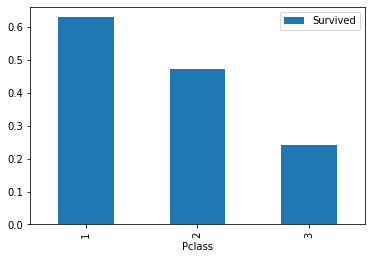

In [37]:
# Analyzing the feature Pclass
pclass_pivot = train_df.pivot_table(index = "Pclass", values= "Survived")
#pclass_pivot
pclass_pivot.plot.bar()
plt.show()

Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1

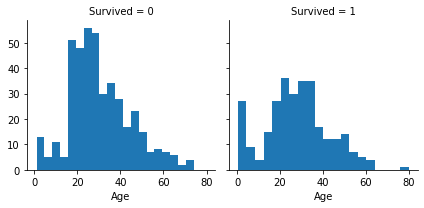

In [38]:
# exploring feature Age
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

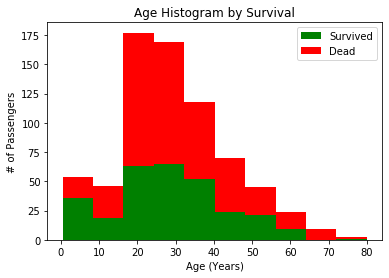

In [39]:
plt.hist(x = [train_df[train_df['Survived']==1]['Age'], train_df[train_df['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

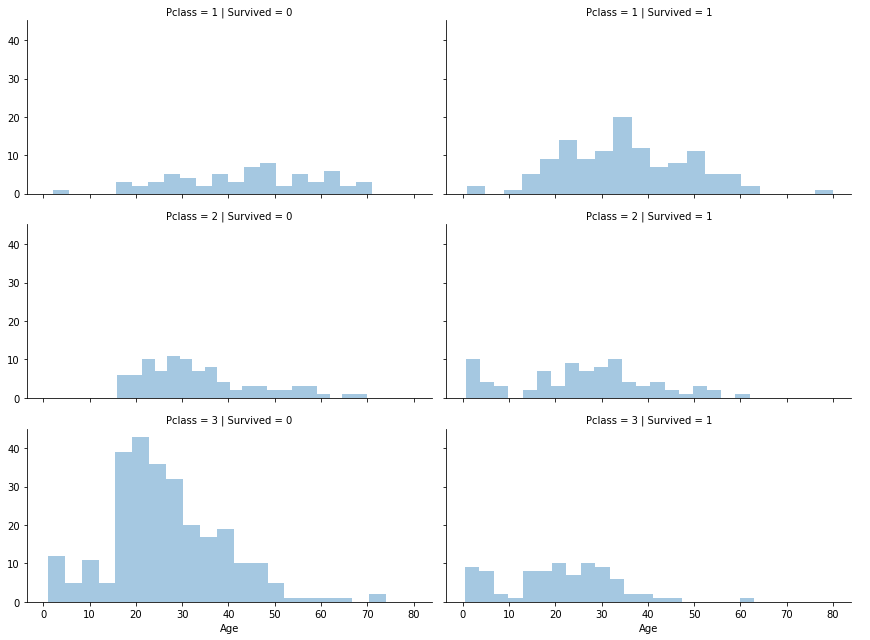

In [40]:
#visualizing the feature Age over Pclass
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=3, aspect=2)
grid.map(plt.hist, 'Age', alpha=0.4, bins=20)
grid.add_legend();

The plot above confirms our assumption about pclass 1, but we can also spot a high probability that a person in pclass 3 will not survive.

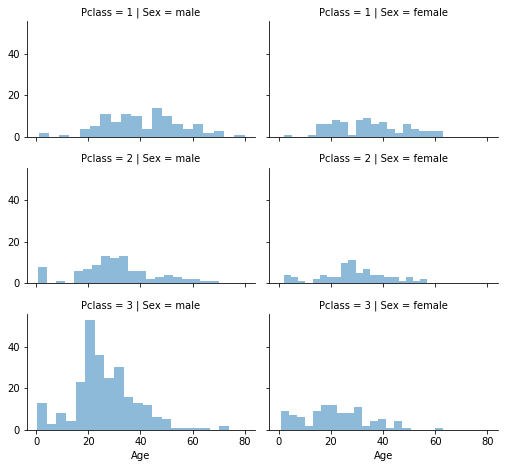

In [41]:
#visualizing Age over Pclass and Sex
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

# Feature Enginering

In [42]:
# New Feature
#trian/test data
data = [train_df, test_df]
for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1
    dataset['IsAlone'] = dataset['IsAlone'].astype(int)
    
train_df['IsAlone'].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


1    537
0    354
Name: IsAlone, dtype: int64

In [43]:
#complete or delete missing values in train/test dataset
#complete missing age with median

#train_df['Embarked'].describe()
common_value = 'S'  

data = [train_df, test_df]
for dataset in data:
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
     # fill Embarked 
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
    
drop_column = ['PassengerId','Cabin', 'Ticket']
train_df.drop(drop_column, axis=1, inplace = True)
test_df.drop(drop_column, axis=1, inplace = True)
train_df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int32
dtypes: float64(2), int32(1), int64(5), object(3)
memory usage: 73.2+ KB


In [44]:
#Convert Embarked tu numeric
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
train_df.head()    

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1,2,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,0,2,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,1,1


In [45]:
#Categorize the feature Age
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

train_df['Age'].value_counts()

4    303
6    148
3    106
5    103
2     92
1     71
0     68
Name: Age, dtype: int64

In [46]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)
    
    
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,"Braund, Mr. Owen Harris",0,2,1,0,7.2500,0,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,71.2833,1,2,0
2,1,3,"Heikkinen, Miss. Laina",1,3,0,0,7.9250,0,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,53.1000,0,2,0
4,0,3,"Allen, Mr. William Henry",0,5,0,0,8.0500,0,1,1


# Model Data
## Define, train and test a ML model
### We are using the following estimators:
* Logistic Regression
* KNN
* SVM
* Decision Tree
* Random Forrest

In [56]:
#Define the features (X) and the label (Y)
X_train = train_df.drop(["Name","Survived"], axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("Name", axis=1).copy()

X_test.shape, Y_train.shape, X_train.shape

((418, 9), (891,), (891, 9))

In [57]:
#Import functons
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [61]:
#Logistic Regression
logr = LogisticRegression()
logr.fit(X_train, Y_train)
predictions = logr.predict(X_test)
acc_logr = round(logr.score(X_train, Y_train) * 100, 2)
acc_logr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.92

In [68]:
#SVM
svc = SVC(gamma='auto')
svc.fit(X_train, Y_train)
predictions = svc.predict(X_test)
acc_svc = round(svc.score(X_train,  Y_train)*100, 2)
acc_svc

85.63

In [65]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.86

In [66]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
predictions = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

94.95

In [60]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest


94.95

In [70]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
predictions = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian


79.57

In [72]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree', 'Gaussian Naive Bayes'],
    'Score': [acc_svc, acc_knn, acc_logr, 
              acc_random_forest, acc_decision_tree, acc_gaussian]})
models.sort_values(by='Score', ascending=False).set_index('Score')

,Model
Score,
94.95,Random Forest
94.95,Decision Tree
85.86,KNN
85.63,Support Vector Machines
80.92,Logistic Regression
79.57,Gaussian Naive Bayes
